In [ ]:
import os
print(os.getcwd())
print(os.__file__)

: 

In [2]:
import torch
import numpy as np

Prevent Gradient History

In [3]:
x = torch.rand(3, requires_grad=True) 
print(x)
# x.requires_grad_(False) 
# y = x.detach()
# with torch.no_grad():
y = x + 2
print(y)
print(x)
print(y)



tensor([0.3637, 0.7189, 0.0213], requires_grad=True)
tensor([2.3637, 2.7189, 2.0213], grad_fn=<AddBackward0>)
tensor([0.3637, 0.7189, 0.0213], requires_grad=True)
tensor([2.3637, 2.7189, 2.0213], grad_fn=<AddBackward0>)


Zero gradients

In [10]:
weights = torch.ones(4, requires_grad=True) 
for epoch in range(1):
  print('weights: ',weights)  

  model_output = (weights+3).sum()  
  print('model_output: ',model_output)
  model_output.backward()
  print('weights: ',weights)
  print('Grad weights', weights.grad)
  weights.grad.zero_()
  print('Grad weights: ', weights.grad)

weights:  tensor([1., 1., 1., 1.], requires_grad=True)
model_output:  tensor(16., grad_fn=<SumBackward0>)
weights:  tensor([1., 1., 1., 1.], requires_grad=True)
Grad weights tensor([1., 1., 1., 1.])
Grad weights:  tensor([0., 0., 0., 0.])


Backpropagation

In [5]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad=True)
y_hat = w * x
loss  = (y_hat - y)**2

print(loss)

# backward
loss.backward()
print(w.grad)


tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


Gradient descent Autograd and Backpropagation

In [6]:
# linear regression manuel

# f = w * x
# f = 2*x we are looking for

x = np.array([1,2,3,4], dtype=np.float32)
y = np.array([2,4,6,8], dtype=np.float32)

w = 0.0

# model prediction
def forward(x):
  return w * x

# loss = MSE
def loss(y, y_pred):
  return ((y_pred - y)**2).mean()

# gradient
# MSE 1/N * (w * x - y)**2 the loss from above
# gradient dloss/dw = 1/N 2x (wx - y)
def gradient(x, y,y_pred):
  return np.dot((2*x), (y_pred - y)).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_itters = 10
for epoch in range(n_itters):
  # prediction = forward path
  y_pred = forward(x)

  # loss
  l = loss(y,y_pred)

  # Garadients
  dw = gradient(x=x,y=y,y_pred=y_pred)

  # update weights
  w -= learning_rate * dw

  if epoch % 1 == 0:
    print(f'epoch {epoch + 1 }: w = {w:.3f}, loss = {l:.8f} ')

print(f'Prediction after training: f(5) = {forward(5):.3f}')  

Prediction before training: f(5) = 0.000
epoch 1: w = 1.200, loss = 30.00000000 
epoch 2: w = 1.680, loss = 4.79999924 
epoch 3: w = 1.872, loss = 0.76800019 
epoch 4: w = 1.949, loss = 0.12288000 
epoch 5: w = 1.980, loss = 0.01966083 
epoch 6: w = 1.992, loss = 0.00314574 
epoch 7: w = 1.997, loss = 0.00050331 
epoch 8: w = 1.999, loss = 0.00008053 
epoch 9: w = 1.999, loss = 0.00001288 
epoch 10: w = 2.000, loss = 0.00000206 
Prediction after training: f(5) = 9.999


In [7]:


# f = w * x
# f = 2*x we are looking for

x = torch.tensor([1,2,3,4], dtype=torch.float32)
y = torch.tensor([2,4,6,8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction
def forward(x):
  return w * x

# loss = MSE
def loss(y, y_pred):
  return ((y_pred - y)**2).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_itters = 100
for epoch in range(n_itters):
  # prediction = forward path
  y_pred = forward(x)

  # loss
  l = loss(y,y_pred)

  # Garadients = backward pass
  l.backward() # dloss/dw
  
  # update weights should not be part of the computational graph
  with torch.no_grad():
    w -= learning_rate * w.grad

  # zero gradients because othervice the calculated gradients would
  # be accumulated
  w.grad.zero_()

  if epoch % 10 == 0:
    print(f'epoch {epoch + 1 }: w = {w:.3f}, loss = {l:.8f} ')

print(f'Prediction after training: f(5) = {forward(2.5):.3f}')  

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000 
epoch 11: w = 1.665, loss = 1.16278565 
epoch 21: w = 1.934, loss = 0.04506890 
epoch 31: w = 1.987, loss = 0.00174685 
epoch 41: w = 1.997, loss = 0.00006770 
epoch 51: w = 1.999, loss = 0.00000262 
epoch 61: w = 2.000, loss = 0.00000010 
epoch 71: w = 2.000, loss = 0.00000000 
epoch 81: w = 2.000, loss = 0.00000000 
epoch 91: w = 2.000, loss = 0.00000000 
Prediction after training: f(5) = 5.000


Training pipeline: Model, loss and optimizer

In [11]:
# 1) Design model (input output size, forward pass)
# 2) Constructing loss and optimizer
# 3) Training loop
#    -forward
#     -backward pass: gradient
#     updtae weights

import torch.nn as nn

# f = w * x
# f = 2*x we are looking for

# New shape when using nn models
x = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
y = torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)

x_test = torch.tensor([5], dtype=torch.float32)

n_samples, n_features = x.shape
print(f'Samples: {n_samples}, features: {n_features}') 
input_size = n_features
out_size = n_features
# just for manuel define
# w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

learning_rate = 0.01
# model prediction
# manuel
# def forward(x):
#   return w * x

# instead nn model we have to change shape of input
# model = nn.Linear(input_size, out_size)

# or create a costum model
# Create a custom model
class LienearRegression(nn.Module):

  def __init__(self, input_dim, output_dim):
    super(LienearRegression, self).__init__()
    # define layters
    self.lin = nn.Linear(in_features=input_dim, out_features=output_dim)

  def forward(self, x):
    return self.lin(x)  

model = LienearRegression(input_dim=input_size, output_dim=out_size)



# loss = MSE
loss = nn.MSELoss()

# Optimizer
# we can get the weights from model.parameters()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

print(f'Prediction before training: f(5) = {model(x_test).item():.3f}')

# Training

n_itters = 1000
for epoch in range(n_itters):
  # prediction = forward path
  y_pred = model(x)

  # loss
  l = loss(y,y_pred)

  # Garadients = backward pass
  l.backward() # dloss/dw
  
  optimizer.step()

  # zero gradients because othervice the calculated gradients would
  # be accumulated
  w.grad.zero_()

  if epoch % 10 == 0:
    [w, b] = model.parameters()
    print(f'epoch {epoch + 1 }: w = {w[0][0].item():.3f}, b = {b[0].item():.3f} loss = {l:.8f} ')

print(f'Prediction after training: f(5) = {model(x_test).item():.3f}')  

Samples: 4, features: 1
Prediction before training: f(5) = 2.296
epoch 1: w = 0.770, b = -0.282 loss = 18.96096230 
epoch 11: w = 1.542, b = 2.063 loss = 0.79310715 
epoch 21: w = 1.130, b = 3.178 loss = 2.04212499 
epoch 31: w = 1.069, b = 2.435 loss = 1.15040660 
epoch 41: w = 1.336, b = 1.378 loss = 0.67693180 
epoch 51: w = 1.601, b = 0.804 loss = 0.26456171 
epoch 61: w = 1.742, b = 0.607 loss = 0.09204076 
epoch 71: w = 1.802, b = 0.508 loss = 0.05135943 
epoch 81: w = 1.843, b = 0.393 loss = 0.03258922 
epoch 91: w = 1.882, b = 0.280 loss = 0.01883996 
epoch 101: w = 1.916, b = 0.195 loss = 0.00978376 
epoch 111: w = 1.940, b = 0.141 loss = 0.00488339 
epoch 121: w = 1.956, b = 0.105 loss = 0.00254761 
epoch 131: w = 1.968, b = 0.078 loss = 0.00138982 
epoch 141: w = 1.976, b = 0.057 loss = 0.00075984 
epoch 151: w = 1.983, b = 0.041 loss = 0.00040750 
epoch 161: w = 1.987, b = 0.030 loss = 0.00021568 
epoch 171: w = 1.991, b = 0.022 loss = 0.00011437 
epoch 181: w = 1.993, b = 

epoch 251: w = 1.999, b = 0.002 loss = 0.00000076 
epoch 261: w = 1.999, b = 0.001 loss = 0.00000041 
epoch 271: w = 2.000, b = 0.001 loss = 0.00000022 
epoch 281: w = 2.000, b = 0.001 loss = 0.00000012 
epoch 291: w = 2.000, b = 0.001 loss = 0.00000006 
epoch 301: w = 2.000, b = 0.000 loss = 0.00000003 
epoch 311: w = 2.000, b = 0.000 loss = 0.00000002 
epoch 321: w = 2.000, b = 0.000 loss = 0.00000001 
epoch 331: w = 2.000, b = 0.000 loss = 0.00000001 
epoch 341: w = 2.000, b = 0.000 loss = 0.00000000 
epoch 351: w = 2.000, b = 0.000 loss = 0.00000000 
epoch 361: w = 2.000, b = 0.000 loss = 0.00000000 
epoch 371: w = 2.000, b = 0.000 loss = 0.00000000 
epoch 381: w = 2.000, b = 0.000 loss = 0.00000000 
epoch 391: w = 2.000, b = 0.000 loss = 0.00000000 
epoch 401: w = 2.000, b = 0.000 loss = 0.00000000 
epoch 411: w = 2.000, b = 0.000 loss = 0.00000000 
epoch 421: w = 2.000, b = 0.000 loss = 0.00000000 
epoch 431: w = 2.000, b = 0.000 loss = 0.00000000 
epoch 441: w = 2.000, b = 0.000

Linearregression torch model

epoch: 10, loss = 4383.5991
epoch: 20, loss = 3269.2988
epoch: 30, loss = 2463.4746
epoch: 40, loss = 1880.0852
epoch: 50, loss = 1457.2983
epoch: 60, loss = 1150.6106
epoch: 70, loss = 927.9451
epoch: 80, loss = 766.1526
epoch: 90, loss = 648.5033
epoch: 100, loss = 562.8950


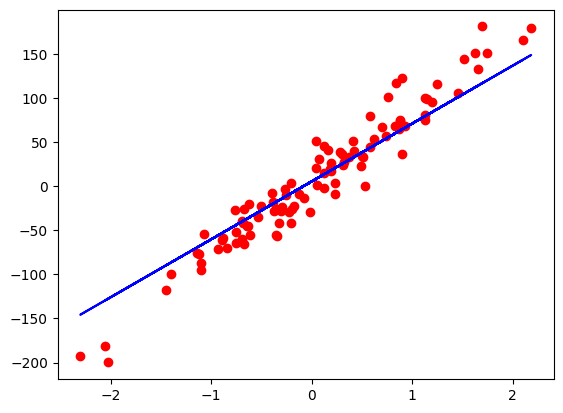

In [18]:
from sklearn import datasets
import matplotlib.pyplot as plt

# 0) Prepare data
x_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
# x becomes a row vector
x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
# but the y values are still a column vector and 
# we need to reshape them to a row vector with one feature
y = y.view(y.shape[0], 1)
n_samples, n_features = x.shape

# 1) Model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2) Loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) Training loop
num_epochs = 100
for epoch in range(num_epochs):

  # forward pass and loss
  y_predicted = model(x)
  loss = criterion(input=y_predicted, target=y)

  # backward pass
  loss.backward()
  optimizer.step()
  # The backward will sum up to the previous gradients, so it needs to be zeroed 
  # out explicitly before calling loss.backward() again.
  optimizer.zero_grad()

  if (epoch+1) % 10 == 0:
    print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# plot
predicted = model(x).detach().numpy() 
plt.plot(x_numpy, y_numpy, 'ro')
plt.plot(x_numpy, predicted, 'b')
plt.show()



In [29]:
# 1) Design model (input output size, forward pass)
# 2) Constructing loss and optimizer
# 3) Training loop
#    -forward
#     -backward pass: gradient
#     updtae weights

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split  
######################################################################
# 0) Prepare data
######################################################################
bc  = datasets.load_breast_cancer()
X, y = bc.data, bc.target
n_samples, n_features = X.shape
print(n_samples, n_features)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# scale
# If no other arguments are given,
# the mean and standard deviation are estimated from the data.
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

x_train = torch.from_numpy(x_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))
# but the y values are still a column vector and
# we need to reshape them to a row vector with one feature
y_train = y_train.view(y_train.shape[0], 1) 
y_test = y_test.view(y_test.shape[0], 1)
output_size = y_test.shape[1]

######################################################################
# 1) model
######################################################################
# f = wx + b, sigmoid at the end
class LogisticRegression(nn.Module):

  def __init__(self, n_input_features, n_output_features):
    super(LogisticRegression, self).__init__()
    self.lin = nn.Linear(n_input_features, n_output_features)

  def forward(self, x):
    y_pred = torch.sigmoid(self.lin(x))
    return y_pred

model = LogisticRegression(n_input_features=n_features, n_output_features=output_size)

######################################################################
# 2) loss and optimizer
######################################################################
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

######################################################################
# 3) Training loop
######################################################################
num_epochs = 100
for epoch in range(num_epochs):
  # forward pass and loss
  y_pred = model(x_train)
  loss = criterion(input=y_pred, target=y_train)

  # backward pass
  loss.backward()
  optimizer.step()
  # The backward will sum up to the previous gradients, so it needs to be zeroed
  # out explicitly before calling loss.backward() again.
  optimizer.zero_grad()

  if (epoch+1) % 10 == 0:
    print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# Evaluation should not be part of the computational graph
with torch.no_grad():
  y_predicted = model(x_test)
  print(f'y_predicted: {y_predicted[0][0].item()}')
  # Values equidistant from two integers are rounded towards the
  #   the nearest even value (zero is treated as even)
  y_predicted_cls = y_predicted.round() # if >= 0.5 1 else 0
  print(f'y_predicted_cls: {y_predicted_cls[0][0].item()}')

  acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
  print(f'accuracy: {acc.item():.4f}')

      


569 30
epoch: 10, loss = 0.5461
epoch: 20, loss = 0.4514
epoch: 30, loss = 0.3912
epoch: 40, loss = 0.3494
epoch: 50, loss = 0.3185
epoch: 60, loss = 0.2946


epoch: 70, loss = 0.2754
epoch: 80, loss = 0.2596
epoch: 90, loss = 0.2464
epoch: 100, loss = 0.2350
y_predicted: 0.7588673830032349
y_predicted_cls: 1.0
accuracy: 0.9123
